In [1]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [2]:
# read data from json file

import json

data = json.load(open('training_data/training_data.json'))

len(data.keys())

21

In [105]:
# for each key in data, get the data by one user

data['EVDUQ'].keys()

dict_keys(['back', 'left', 'right', 'age', 'height', 'weight', 'gender'])

In [106]:
# select 6 random user for test set and rest for training set

np.random.seed(0)

test_users = np.random.choice(list(data.keys()), 6, replace=False)

# select 3 random user for validation set and rest for training set

val_users = np.random.choice([user for user in data.keys() if user not in test_users], 3, replace=False)

train_users = [user for user in data.keys() if user not in test_users]

train_users = [user for user in train_users if user not in val_users]

print('test_users: ', test_users)
print('val_users: ', val_users)
print('train_users: ', train_users)

test_users:  ['kJBUQ' 'UFHVw' 'UJKXA' 'EtEUA' 'EtAUg' '0ZAVg']
val_users:  ['0RCVw' 'UdAUA' 'EBHUg']
train_users:  ['EVDUQ', 'EtFVg', '0BLVw', 'UtGVw', 'EtKUA', 'ENEVQ', 'URAUw', 'EJKVg', '0REVg', 'ERHUw', 'kdDVQ', 'EBCXQ']


In [107]:
# create training set and test set

train_set = []
posture_list = ['back','left','right']

posture_list_id = {'back':0,'left':1,'right':2}

for user in train_users:
    for posture in posture_list:
        for i in range(3):
            train_set.append({'x':np.array(data[user][posture][i]), 'y':np.array(posture_list_id[posture])})

test_set = []

for user in test_users:
    for posture in posture_list:
        for i in range(3):
            test_set.append({'x':np.array(data[user][posture][i]), 'y':np.array(posture_list_id[posture])})

val_set = []

for user in val_users:
    for posture in posture_list:
        for i in range(3):
            val_set.append({'x':np.array(data[user][posture][i]), 'y':np.array(posture_list_id[posture])})

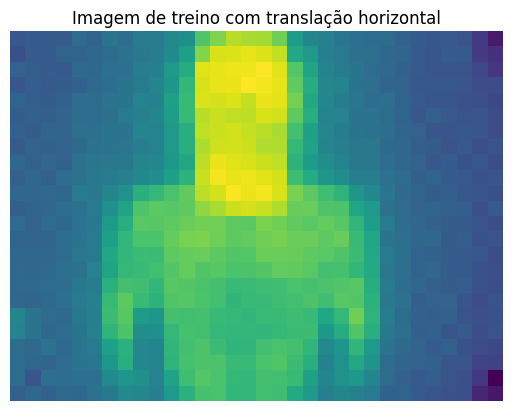

In [108]:
plt.imshow(train_set[0]['x'], interpolation='nearest')
# disabilita os eixos
plt.axis('off')
plt.title('Imagem de treino com translação horizontal')
plt.show()

im1 = train_set[0]['x']

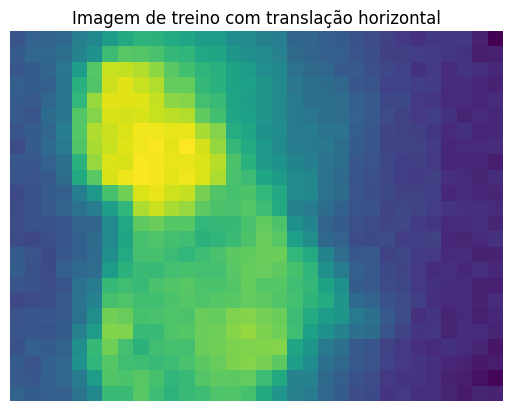

In [109]:
plt.imshow(train_set[31]['x'], interpolation='nearest')
# disabilita os eixos
plt.axis('off')
plt.title('Imagem de treino com translação horizontal')
plt.show()

im2 = train_set[31]['x']

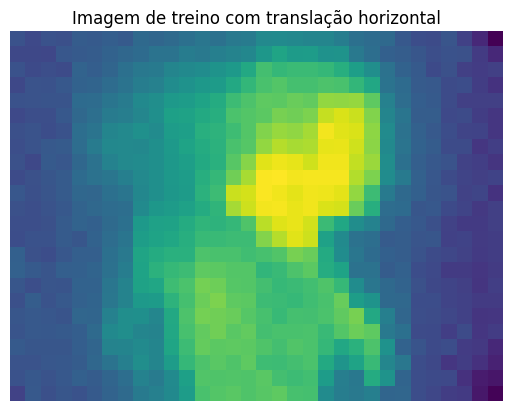

In [110]:
plt.imshow(train_set[33]['x'], interpolation='nearest')
# disabilita os eixos
plt.axis('off')
plt.title('Imagem de treino com translação horizontal')
plt.show()

im3 = train_set[33]['x']

In [111]:
import numpy as np

train_set_arg = []

range_shift = 7
plot = True
j = 1

for n in range(-range_shift,range_shift+1):
    for i in train_set:
        img = i['x']
        min_id = np.argmin(np.mean(img, axis=0))  # Encontre a coluna com a menor temperatura média
        # converta os valores menores que a mediana dessa coluna para o valor da mediana
        img[:, min_id] = np.where(img[:, min_id] < np.median(img[:, min_id]), np.median(img[:, min_id]), img[:, min_id])
        min_id = np.argmin(np.mean(img, axis=0))
        shifted = np.roll(img, n, axis=1)  # Mova a imagem horizontalmente
        if n > 0:
            shifted[:, :n] = img[:, min_id:min_id+1]    # 
            shifted[:, :n] = shifted[:, :n] + np.random.normal(0, 0.25, shifted[:, :n].shape)
        else:
            shifted[:, n:] = img[:, min_id:min_id+1]  
            shifted[:, n:] = shifted[:, n:] + np.random.normal(0,0.25, shifted[:, n:].shape)
        # verifica se as três primeiras colunas tem temperatura maior que a mediana se sim, não adiciona a imagem
        # if np.all(shifted[:, :4] > np.median(shifted)):
        #     continue
        # # verifica se as três últimas colunas tem temperatura maior que a mediana se sim, não adiciona a imagem
        # if np.all(shifted[:, -4:] > np.median(shifted)):
        #     continue
        train_set_arg.append({'x': shifted, 'y': i['y']})  # Adicione a imagem modificada ao conjunto de teste

train_set = train_set_arg.copy()

val_set_arg = []

for n in range(-range_shift,range_shift+1):
    for i in val_set:
        img = i['x']
        min_id = np.argmin(np.mean(img, axis=0))  # Encontre a coluna com a menor temperatura média
        # converta os valores menores que a mediana dessa coluna para o valor da mediana
        img[:, min_id] = np.where(img[:, min_id] < np.median(img[:, min_id]), np.median(img[:, min_id]), img[:, min_id])
        min_id = np.argmin(np.mean(img, axis=0))
        shifted = np.roll(img, n, axis=1)  # Mova a imagem horizontalmente
        if n > 0:
            shifted[:, :n] = img[:, min_id:min_id+1]    # 
            shifted[:, :n] = shifted[:, :n] + np.random.normal(0, 0.25, shifted[:, :n].shape)
        else:
            shifted[:, n:] = img[:, min_id:min_id+1]  
            shifted[:, n:] = shifted[:, n:] + np.random.normal(0,0.25, shifted[:, n:].shape)

        # # verifica se as três primeiras colunas tem temperatura maior que a mediana se sim, não adiciona a imagem
        # if np.all(shifted[:, :4] > np.median(shifted)):
        #     continue
        # # verifica se as três últimas colunas tem temperatura maior que a mediana se sim, não adiciona a imagem
        # if np.all(shifted[:, -4:] > np.median(shifted)):
        #     continue

        val_set_arg.append({'x': shifted, 'y': i['y']})  # Adicione a imagem modificada ao conjunto de teste

val_set = val_set_arg.copy()

In [112]:
print(len(train_set))

1620


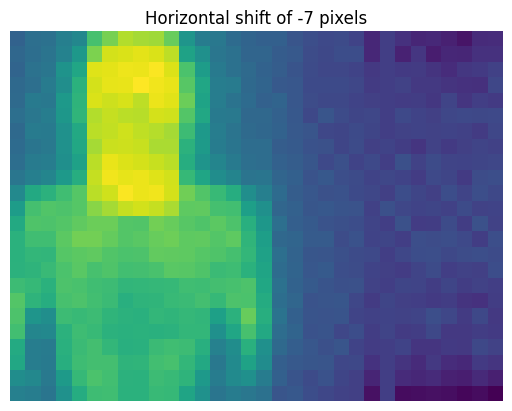

In [113]:
plt.imshow(train_set[0]['x'], interpolation='nearest')
# disabilita os eixos
plt.axis('off')
plt.title('Horizontal shift of -7 pixels')
plt.show()

img11 = train_set[0]['x']

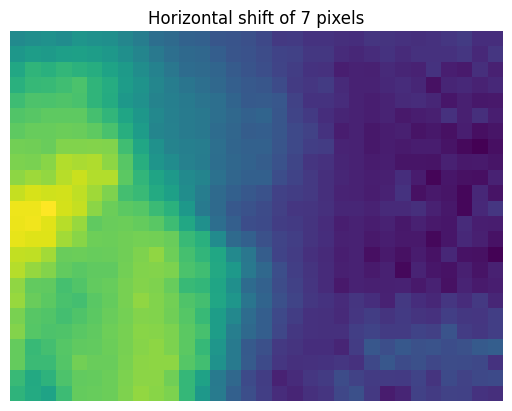

In [114]:
plt.imshow(train_set[32]['x'], interpolation='nearest')
# disabilita os eixos
plt.axis('off')
plt.title('Horizontal shift of 7 pixels')
plt.show()

img12 = train_set[31]['x']

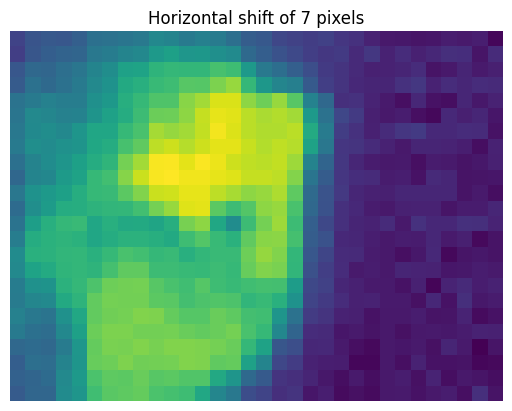

In [115]:
plt.imshow(train_set[34]['x'], interpolation='nearest')

# disabilita os eixos

plt.axis('off')

plt.title('Horizontal shift of 7 pixels')

plt.show()

img13 = train_set[33]['x']

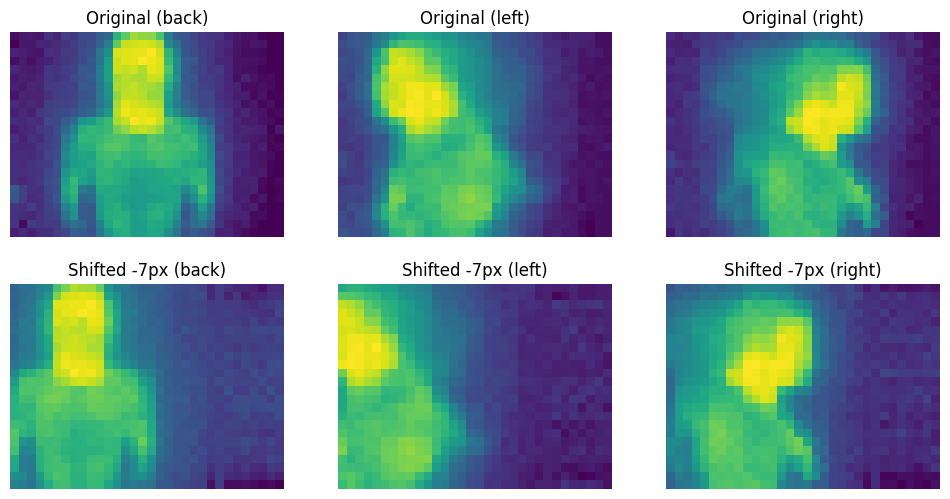

In [116]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(im1, interpolation='nearest')
plt.axis('off')
plt.title('Original (back)')

plt.subplot(2, 3, 2)
plt.imshow(im2, interpolation='nearest')
plt.axis('off')
plt.title('Original (left)')

plt.subplot(2, 3, 3)
plt.imshow(im3, interpolation='nearest')
plt.axis('off')
plt.title('Original (right)')

plt.subplot(2, 3, 4)
plt.imshow(img11, interpolation='nearest')
plt.axis('off')
plt.title('Shifted -7px (back)')

plt.subplot(2, 3, 5)
plt.imshow(img12, interpolation='nearest')
plt.axis('off')
plt.title('Shifted -7px (left)')

plt.subplot(2, 3, 6)
plt.imshow(img13, interpolation='nearest')
plt.axis('off')
plt.title('Shifted -7px (right)')

plt.show()

In [117]:
# # export the data

# np.savez('training_data/training_data_arg2.npz', train_set=train_set, test_set=test_set, val_set=val_set)